In [1]:
import os
import csv
import pandas as pd
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
file_dir = path + "/Deep_nets/UFold/"

epoch_list, train_val_loss, epoch_time = [],[],[]

with open(file_dir+"results_1.txt") as file:
    lines = file.readlines()
lines = lines[1:]
total_epochs = len(lines)
for line in lines:
    split_line = line.split(", ")
    epoch_list.append(int(split_line[0]))
    train_val_loss.append([float(split_line[1]),float(split_line[2]), float(split_line[3])])
    epoch_time.append(float(split_line[4]))
print (len(epoch_list))
print (len(train_val_loss))

with open(file_dir+"results_2.txt") as file:
    lines = file.readlines()
lines = lines[1:]

first = True

for line in lines:
    split_line = line.split(", ")
    epoch_list.append(total_epochs + int(split_line[0]))
    train_val_loss.append([float(split_line[1]),float(split_line[2]), float(split_line[3])])
    epoch_time.append(float(split_line[4]))

total_epochs = float(total_epochs) + len(lines)
print (len(epoch_list))
print (len(train_val_loss))

df = pd.DataFrame(train_val_loss,index= epoch_list, columns=["Train Loss", "Val Loss", "Val F1"])
print((df))

14
14
30
30
    Train Loss  Val Loss    Val F1
0     0.170354  0.234139  0.618473
1     0.153072  0.186612  0.689737
2     0.090595  0.165060  0.725845
3     0.109465  0.150955  0.747117
4     0.216994  0.149297  0.750496
5     0.384835  0.131223  0.787191
6     0.038629  0.129870  0.802680
7     0.080278  0.129627  0.800855
8     0.077351  0.136536  0.806928
9     0.064817  0.127386  0.821637
10    0.093845  0.130948  0.816148
11    0.037130  0.138807  0.827728
12    0.140176  0.154086  0.826815
13    0.066615  0.152294  0.839136
14    0.066539  0.139280  0.838778
15    0.099893  0.137881  0.841110
16    0.036907  0.142700  0.838456
17    0.192228  0.164244  0.845877
18    0.120392  0.152932  0.847772
19    0.340995  0.180486  0.843748
20    0.019373  0.157375  0.856171
21    0.071904  0.155435  0.849412
22    0.063086  0.158203  0.860460
23    0.062107  0.171509  0.854044
24    0.028677  0.200934  0.868829
25    0.044845  0.150607  0.858031
26    0.134718  0.197230  0.864909
27    0.

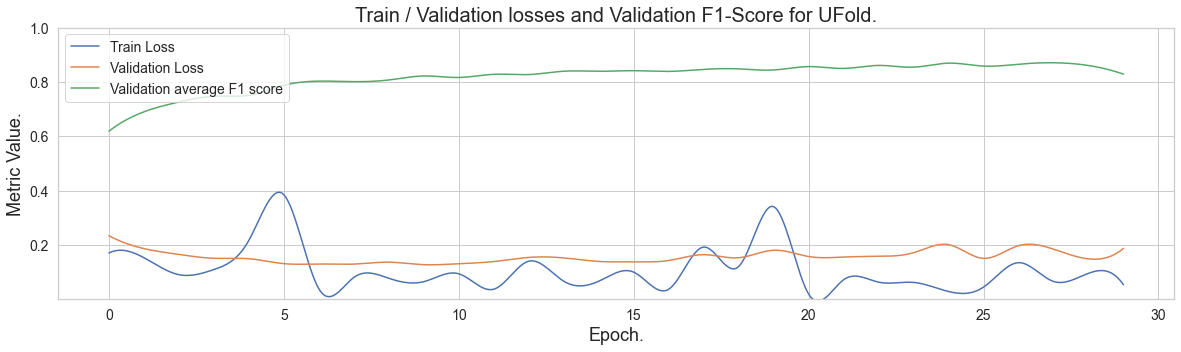

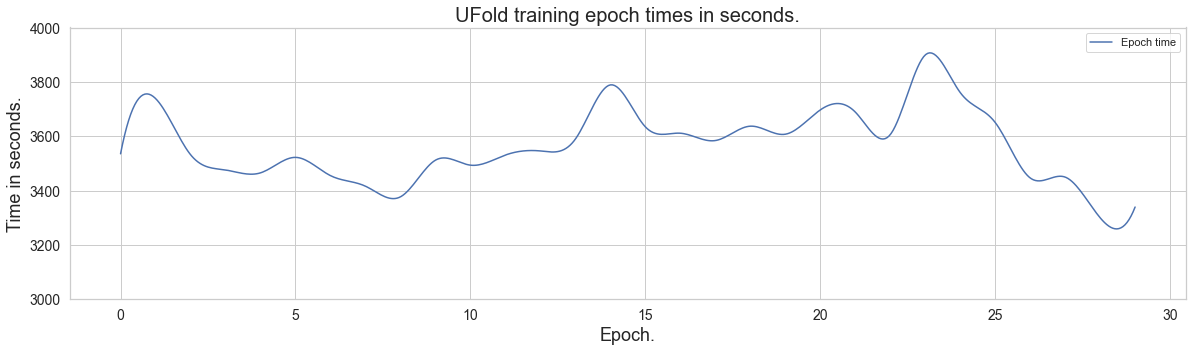

0.10735514865567287
0.15819874931174685


In [9]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20, 5))

val_loss_interpolator = make_interp_spline(epoch_list, list(df["Val Loss"]))
train_loss_interpolator = make_interp_spline(epoch_list, list(df["Train Loss"]))
f1_interpolator = make_interp_spline(epoch_list[:-1], list(df["Val F1"])[:-1])
X_ = np.linspace(epoch_list[0], epoch_list[-1], 500)
Val_ = val_loss_interpolator(X_)
Train_ = train_loss_interpolator(X_)
F1_ = f1_interpolator(X_)

ax.plot(X_, Train_, label='Train Loss')
ax.plot(X_, Val_, label='Validation Loss')
ax.plot(X_, F1_, label='Validation average F1 score')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.legend()
plt.legend(loc=2, prop={'size': 14})
plt.ylim(0.00001, 1.0)
plt.xlabel("Epoch.", fontsize=18)
plt.ylabel("Metric Value.", fontsize=18)
plt.title("Train / Validation losses and Validation F1-Score for UFold.", fontsize=20)
plt.show()

f, ax = plt.subplots(figsize=(20, 5))
epoch_time_interpolator = make_interp_spline(epoch_list, epoch_time)
Times_ = epoch_time_interpolator(X_)

ax.plot(X_, Times_, label='Epoch time')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.legend(loc=2, prop={'size': 14})
ax.legend()
plt.ylim(3000, 4000)
plt.xlabel("Epoch.", fontsize=18)
plt.ylabel("Time in seconds.",fontsize=18)
plt.title("UFold training epoch times in seconds.", fontsize=20)
plt.show()

print(np.mean(df["Train Loss"].values))
print(np.mean(df["Val Loss"].values))

In [8]:
np.average(df["Val F1"].values) 

0.8174091637134552